# 1) Data Preprocessing

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("trip.csv")

In [4]:
df

Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
0      03/01/2024 12:00:00 AM  03/01/2024 12:00:00 AM          15.0   
1      03/01/2024 12:00:00 AM  03/01/2024 12:15:00 AM         900.0   
2      03/01/2024 12:00:00 AM  03/01/2024 12:00:00 AM         711.0   
3      03/01/2024 12:00:00 AM  03/01/2024 12:30:00 AM        1770.0   
4      03/01/2024 12:00:00 AM  03/01/2024 12:15:00 AM         849.0   
...                       ...                     ...           ...   
49995  02/27/2024 10:15:00 AM  02/27/2024 11:00:00 AM        2580.0   
49996  02/27/2024 10:15:00 AM  02/27/2024 10:15:00 AM         360.0   
49997  02/27/2024 10:15:00 AM  02/27/2024 10:45:00 AM        1251.0   
49998  02/27/2024 10:15:00 AM  02/27/2024 10:15:00 AM         172.0   
49999  02/27/2024 10:15:00 AM  02/27/2024 10:30:00 AM        1081.0   

       Trip Miles   Fare  Tips  Tolls  Extras  Trip Total Payment Type  
0            0.09   3.25  0.00    0.0    35.0       38.75  Credit Card  
1            3.00  12.00  0.00    0.0     0.0       12.00         Cash  
2            5.84  16.75  4.45    0.0     5.0       26.70  Credit Card  
3           13.36  34.75  7.85    0.0     4.0       47.10  Credit Card  
4            6.13  18.51  4.31    0.0     0.0       22.82       Mobile  
...           ...    ...   ...    ...     ...         ...          ...  
49995        0.00  44.50  0.00    0.0     5.0       49.50         Cash  
49996        1.30   6.75  0.00    0.0     0.0        6.75         Cash  
49997       11.24  29.75  0.00    0.0     0.0       29.75       Prcard  
49998        1.54   6.75  0.00    0.0     0.0        6.75         Cash  
49999        4.04  14.00  0.00    0.0     0.0       14.00       Prcard  

[50000 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip Start Timestamp  50000 non-null  object 
 1   Trip End Timestamp    50000 non-null  object 
 2   Trip Seconds          49995 non-null  float64
 3   Trip Miles            50000 non-null  float64
 4   Fare                  49855 non-null  float64
 5   Tips                  49855 non-null  float64
 6   Tolls                 49855 non-null  float64
 7   Extras                49855 non-null  float64
 8   Trip Total            49855 non-null  float64
 9   Payment Type          50000 non-null  object 
dtypes: float64(7), object(3)
memory usage: 3.8+ MB


## Summary Statistics

In [6]:
df.describe()

Trip Seconds    Trip Miles          Fare          Tips         Tolls  \
count  49995.000000  50000.000000  49855.000000  49855.000000  49855.000000   
mean    1159.950595      6.262562     21.100016      2.748663      0.106775   
std     1505.919723      6.876711     17.248767      4.090906     19.909250   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      446.000000      0.900000      7.750000      0.000000      0.000000   
50%      865.000000      2.700000     14.250000      1.000000      0.000000   
75%     1613.000000     11.390000     33.000000      4.000000      0.000000   
max    77579.000000    121.370000    523.000000    150.000000   4444.440000   

             Extras    Trip Total  
count  49855.000000  49855.000000  
mean       2.044652     26.183660  
std       21.387083     45.979342  
min        0.000000      0.000000  
25%        0.000000      9.600000  
50%        0.000000     17.060000  
75%        1.000000     38.500000  
max     4445.440000   8901.880000

## Summary null values

In [7]:
df.isnull().sum()

Trip Start Timestamp      0
Trip End Timestamp        0
Trip Seconds              5
Trip Miles                0
Fare                    145
Tips                    145
Tolls                   145
Extras                  145
Trip Total              145
Payment Type              0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

## Fill null with median values

In [10]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
import warnings

In [12]:
warnings.filterwarnings('ignore')

In [13]:
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
df['start_hour'] = df['Trip Start Timestamp'].dt.hour
df['start_day'] = df['Trip Start Timestamp'].dt.dayofweek  
df['start_month'] = df['Trip Start Timestamp'].dt.month

In [14]:
df['speed_mph'] = df['Trip Miles'] / (df['Trip Seconds'] / 3600)
df['speed_mph'].fillna(0, inplace=True)

In [15]:
df['log_trip_miles'] = np.log1p(df['Trip Miles'])
df['log_fare'] = np.log1p(df['Fare'])

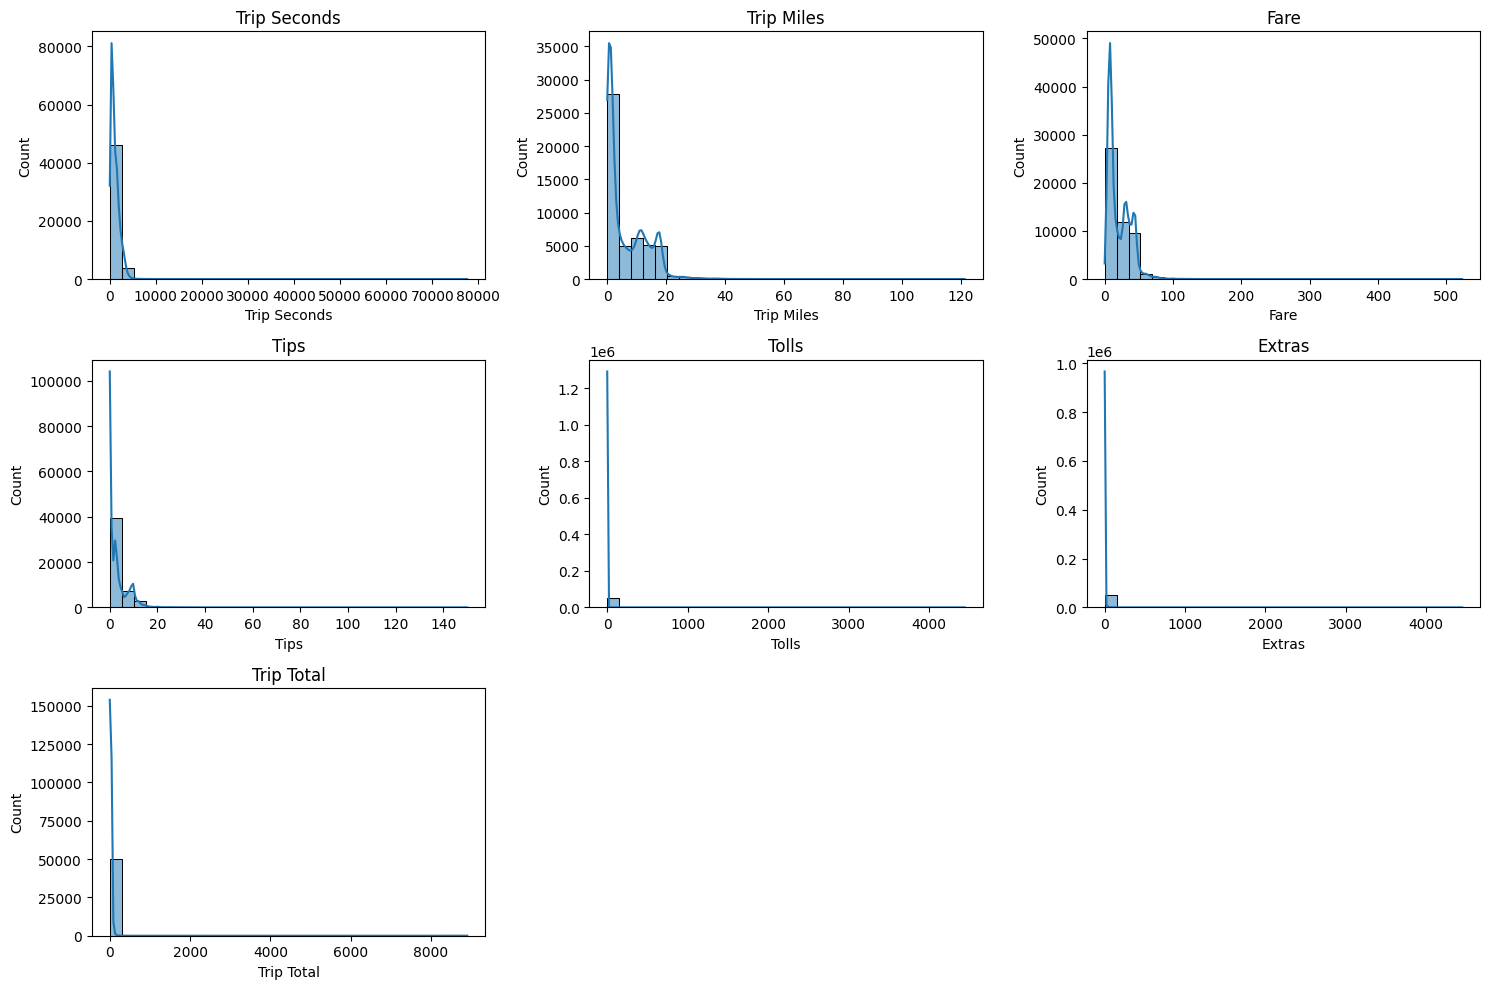

In [16]:
num_cols = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
df = pd.get_dummies(df, columns=['Payment Type'], drop_first=True)

In [18]:
df['trip_miles_x_speed'] = df['Trip Miles'] * df['speed_mph']

In [19]:
X = df[['Trip Seconds', 'Trip Miles', 'speed_mph', 'start_hour', 'start_day', 'start_month', 'log_trip_miles', 'trip_miles_x_speed']]
y = df['Fare']

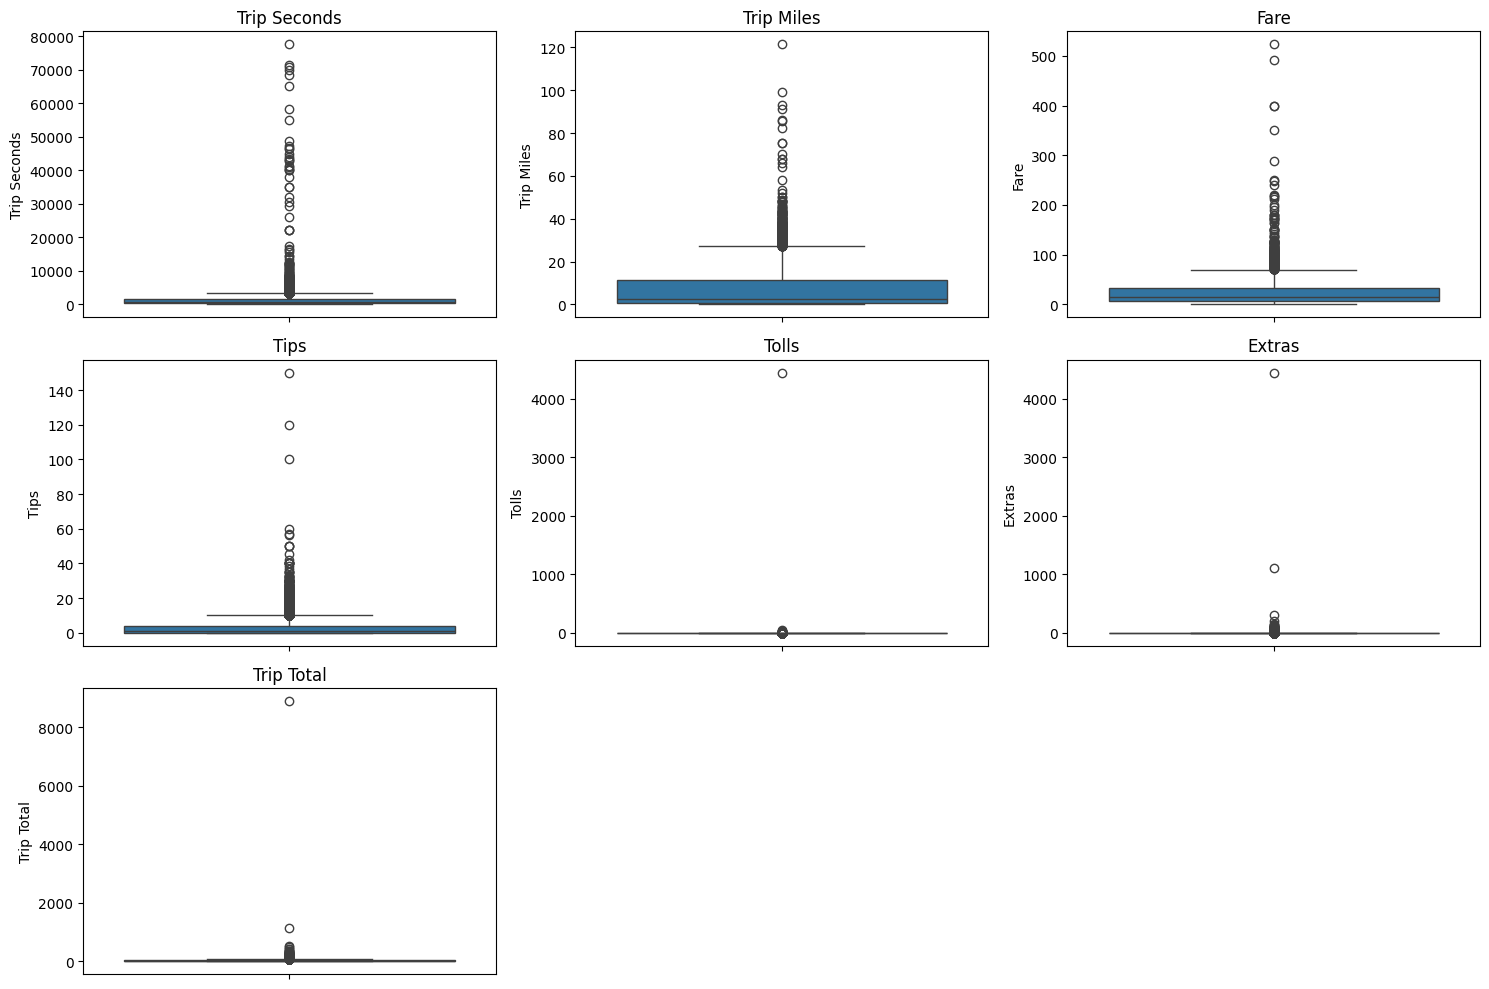

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


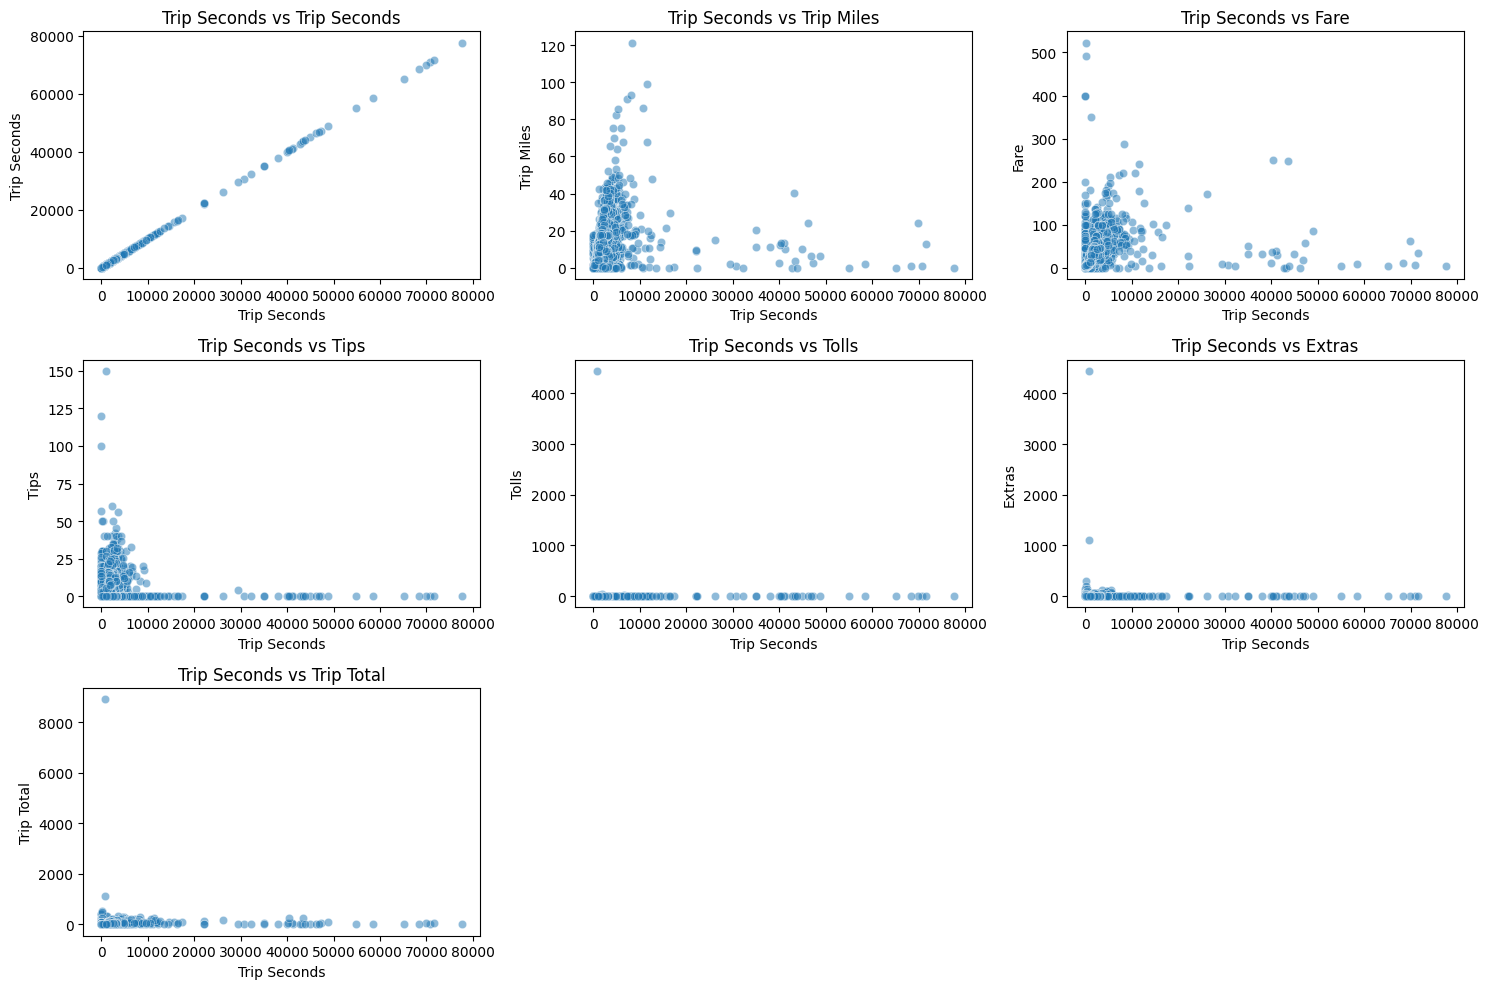

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df['Trip Seconds'], y=df[col], alpha=0.5)
    plt.title(f"Trip Seconds vs {col}")
plt.tight_layout()
plt.show()

In [22]:
print(df.columns)


Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total',
       'start_hour', 'start_day', 'start_month', 'speed_mph', 'log_trip_miles',
       'log_fare', 'Payment Type_Credit Card', 'Payment Type_Dispute',
       'Payment Type_Mobile', 'Payment Type_No Charge', 'Payment Type_Prcard',
       'Payment Type_Unknown', 'trip_miles_x_speed'],
      dtype='object')


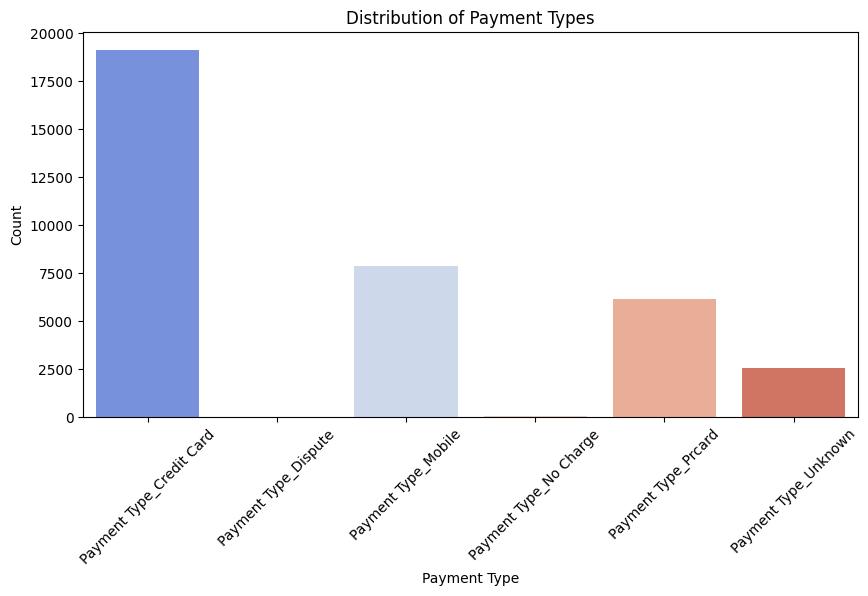

In [23]:

payment_cols = [col for col in df.columns if col.startswith('Payment Type_')]
payment_counts = df[payment_cols].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()



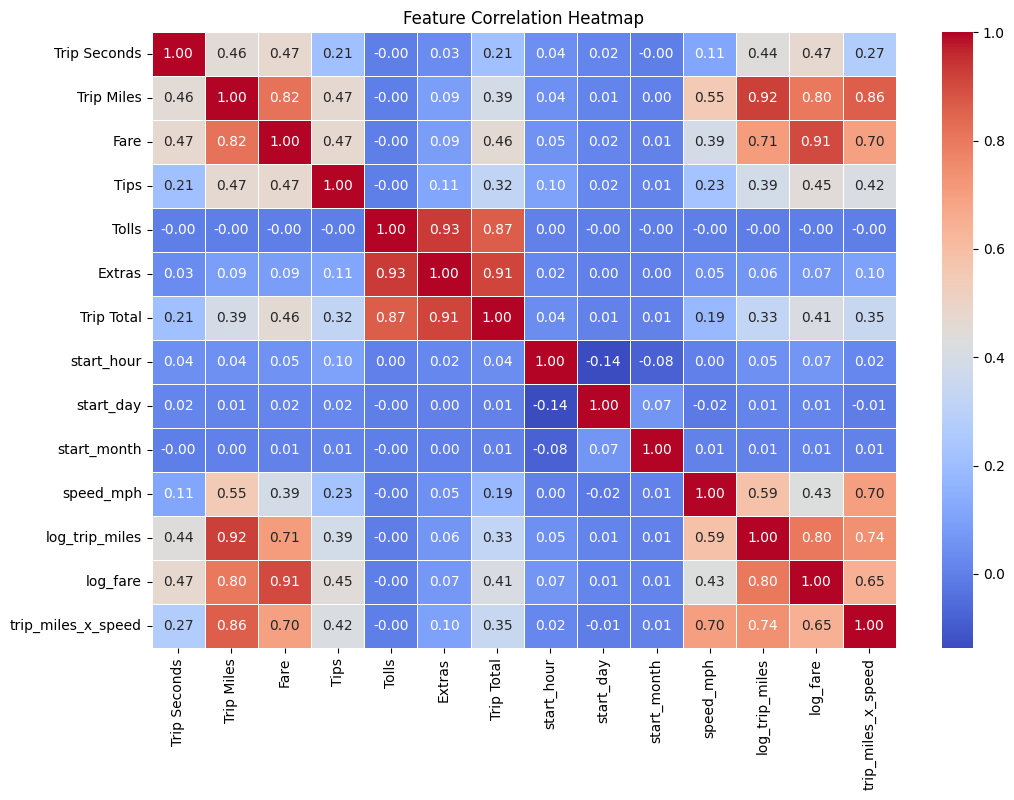

In [24]:

numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# 2) Model Building and Analysis

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
X_train = np.where(np.isinf(X_train), np.nan, X_train)  # Replace inf with NaN
X_train = np.nan_to_num(X_train)  # Replace NaN with zero or another strategy


In [29]:
print("Max value in X_train:", np.max(X_train))
print("Min value in X_train:", np.min(X_train))


Max value in X_train: 77579.0
Min value in X_train: 0.0


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
X_test= np.where(np.isinf(X_test), np.nan, X_test)  # Replace inf with NaN
X_test = np.nan_to_num(X_test)  # Replace NaN with zero or another strategy


In [33]:
X_test = scaler.fit_transform(X_test)

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([ 9.79838365, 20.31468205, 13.22834484, ..., 11.00394963,
       10.4233915 , 10.73382825])

In [36]:
mae = mean_absolute_error(y_test, y_pred)

In [37]:
mae

4.026180790242874

In [38]:
mse = mean_squared_error(y_test, y_pred)

In [39]:
mse

107.95531152666891

In [40]:
r2 = r2_score(y_test, y_pred)

In [41]:
r2

0.6504547411256321

In [42]:
adj_r2 = 1 - (1-r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [43]:
adj_r2

0.6501748530192368

In [44]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adj_r2}")

MAE: 4.026180790242874
MSE: 107.95531152666891
R² Score: 0.6504547411256321
Adjusted R² Score: 0.6501748530192368


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
y_test - y_pred

33553   -0.798384
9427     0.685318
199     -0.088345
12447   -3.174742
39489   -0.234877
           ...   
28567   -5.183180
25079    9.006226
18707   -1.733950
15200   -3.673391
5857    -0.733828
Name: Fare, Length: 10000, dtype: float64

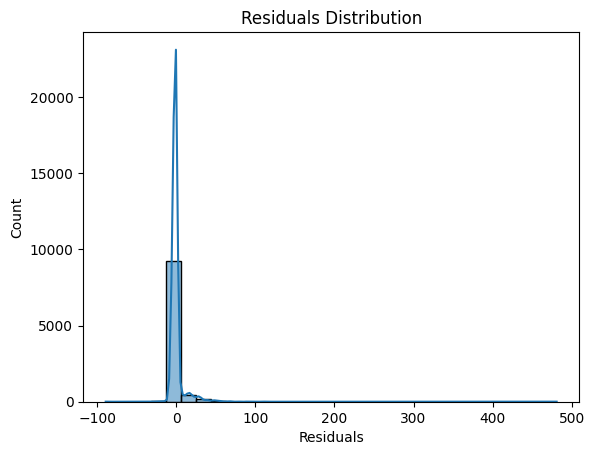

In [47]:
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()